# Computational Activity \#2
## PHYS 210, Fall 2024

## Introduction and goals for today

In the last computational exercise, you began working with scientific Python and Jupyter Notebooks. You learned how Python can be used as a fancy calculator, and you got a taste of how Python libraries can do things (like calculate special functions) that most calculators cannot.

Today, we'll build on what you did last time. In this exercise, you will

* Work with other useful features of Jupyter notebooks, including Markdown cells.
* Learn about NumPy arrays and how they can be useful.
* Learn to write *functions* and how they can simplify complex tasks.
* Get a taste of Python's plotting capabilities (specifically, the package *matplotlib*), which we will explore in more depth in the next computational activity.

For today's exercises, you can either create a new Jupyter notebook, or you can save this notebook under a new name, create new cells, and work directly in it.




## Markdown cells

You are familiar with code cells from the last activity. Jupyter notebooks also support Markdown cells, which allow you to insert commentary using a very simple markup language called Markdown. To make a cell a Markdown cell instead of a code cell, click the button labeled "Code" in the toolbar.

This commentary is actually written using Markdown cells. Running a Markdown cell with `Ctrl - Enter` gets the cell to display in a pretty way, but clicking in the cell lets you see the Markdown syntax itself. Take a look at how you can do headers and bulleted lists in Markdown.

There is another useful feature of Markdown: you can insert mathematical syntax using LaTeX. (If you don't know LaTeX, that's OK -- its simplest and most useful features are natural.) It can be a handy way to insert things like Greek letters in-line: $\alpha, \beta, \gamma, \Gamma, \delta, \Delta.$ You can also insert more involved mathematical expressions on their own lines:

$$ \vec{F}_e = \frac{1}{4\pi \epsilon_0} \frac{q_1q_2}{r^2} \hat{r}.$$

[Here is a short guide to the features of Markdown.](https://www.markdownguide.org/cheat-sheet/) We encourage you to use Markdown cells for explanations of what you're doing and/or your reasoning about data, physics, or math, particularly when your remarks are longer than brief in-line code comments.

### ***EXERCISE 1:***

Create a blank Markdown cell below this one (or in a new notebook) and try some Markdown features for yourself.

## NumPy arrays

Let's get started with actual code now. We'll begin by importing numpy as you did in the last activity:

In [1]:
import numpy as np

Data structures that consist of an ordered arrangement of numerical values can be useful in many contexts. Here are just a few examples:

* You're trying to determine the spring constant of a spring by measuring the force the spring exerts as you stretch the spring different distances. (You'd like to keep your measured set of forces together, and the order of the measurements matters.)
* You're calculating the trajectory of a particle acted upon by some complicated force and want to know the particle positions at regular time intervals.

Python has a built-in `list` object, but the numpy `array` object has a number of features that make it preferable for most computational work. We'll soon see what some of those features are.

Let's begin by creating an array. In the next code cell, I *assign* the variable `foo` to a *1-dimensional* array that I create "by hand." (You should use meaningful names for variables, but I'm just using a silly placeholder here in the absence of a realistic context.)

In [2]:
foo = np.array([1, 1, 2, 3, 5, 8, 13])

Assignment means that I can subsequently use the variable name `foo` to refer to or act on the entire array object I just created. For instance,

In [3]:
print(foo)

[ 1  1  2  3  5  8 13]


prints the array. The most important feature of arrays is the ability to perform mathematical operations on the **entire array at once**. Doing so makes for code that is easier to read and usually more efficient. For example, try some of the following for yourself:

In [4]:
print(foo + 3)
print(2 * foo)

[ 4  4  5  6  8 11 16]
[ 2  2  4  6 10 16 26]


(If you're familiar with Python `list` objects, you probably know that doing the same thing on a list requires explicit iteration over the list elements with a `for` or `while` loop. Don't worry if you haven't worked with `list` objects before and the previous sentence was incomprehensible.)

I can create other arrays in a similar fashion and perform operations with multiple arrays:

In [5]:
bar = np.array([1, 1, 1, 1, 1, 1, 1])
baz = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# we can also use Jupyter in a calculator-like manner with arrays
foo + bar

array([ 2,  2,  3,  4,  6,  9, 14])

However, trying to perform operations on arrays that are not the same shape results in an exception (`foo` has 7 elements whereas `baz` has 8):

In [6]:
foo + baz

ValueError: operands could not be broadcast together with shapes (7,) (8,) 

You can access specific elements of an array via *indexing*. Here are some examples:

In [7]:
print(foo[0]) # indices begin at 0
print(foo[2]) # therefore this is actually the 3rd element of the array

1
2


In [8]:
print(foo[0:5]) # a range of indices, doesn't include the endpoint foo[5]

[1 1 2 3 5]


In [9]:
print(foo[-1]) # last element

13


There are lots of other indexing tricks available -- see the [official documentation on indexing here](https://numpy.org/doc/stable/user/basics.indexing.html) and/or a much more extensive tutorial [here](https://lectures.scientific-python.org/intro/numpy/array_object.html) if you are interested.

Arrays also have useful *methods*, which you can think of as operations that an array can perform on itself. The examples below show several possibilities as well as how to *call* a method:

In [10]:
# add up all the elements
foo.sum()

33

In [11]:
# do the same thing on a different array
baz.sum()

36

In [12]:
#square an array
foo**2 #or
np.square(foo)

array([  1,   1,   4,   9,  25,  64, 169])

In [13]:
print(foo.min(), foo.max()) # get minimum and maximum values

1 13


### ***EXERCISE 2***

Create a blank code cell below. Using the array `foo` defined above, calculate the following by performing mathematical operations on `foo`:

$$\frac{\textrm{foo}^2 + 7}{\textrm{sum of elements in foo}}$$

[Answer: array([ 0.24242424,  0.24242424,  0.33333333,  0.48484848,  0.96969697,
        2.15151515,  5.33333333])]

## Other useful ways to create arrays

Very often you'll want to calculate or plot some mathematical function (either a built-in function or one you've written) over some range of arguments. You might, for instance, want to generate an evenly spaced set of points between two values. There is a nice way to do this via the `np.linspace` function:

In [14]:
# np.linspace takes 3 arguments: start, stop (inclusive), number of points
np.linspace(1, 5, 10)

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

There's another way to do this: the function `np.arange`:

In [15]:
# np.arange takes 3 arguments: start, stop (not inclusive)
# and an optional 3rd argument that is the step size.
# If step size not included, default step size is 1
np.arange(1, 5, 0.2)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

## Writing functions

We now turn to writing *functions*. You have already used a number of Python functions, like `print`, as well as functions that are part of numpy such as `np.array`. Functions provide a useful way to *encapsulate* and reuse code for calculations. Writing functions will also be necessary when you fit models to data.

The writing of functions is best illustrated through an example. The next code cell contains a rather silly example, but we'll use it to point out the important features.

In [16]:
def sum_squares_of_elements(x):
    '''
    Add up the squares of each element of an input array x.
    '''
    # The next line makes x an array if it isn't one already.
    x = np.asarray(x) 
    elements_squared = x**2
    sum_of_elements_squared = elements_squared.sum()
    return sum_of_elements_squared

Here are the features to notice:

* Function definitions must begin with `def`. The name of the function, in this case `sum_squares_of_elements`, follows.
* Functions may have one or more input *arsum_squares_of_elements(wendy)guments*. A function may have no arguments, but most of the ones you'll use and write in this course will have at least one. In this example, `x` is the single argument. The argument or arguments are enclosed in parentheses.
* The `def` statement ends with a colon. Python is sensitive to indentation. If you want subsequent lines to be part of the function, they need to be indented (by convention, 4 spaces; Jupyter will do this for you automatically).
* A comment string (delineated by three apostrophes) called a *documentation string* or *docstring* for short follows the `def` statement. This is optional, but it can be helpful for documenting what the function does. (Choosing sensible names is also a good idea. Don't give your functions a meaningless name like `qwerty17`.)
* The code that the function will execute on its input arguments follows.
* Usually, the results of a function are meant to be used, and you will want a function to `return` one or more arguments. A function is not required to return anything, and you can also return multiple arguments. What you return is arbitrary: in particular, you can return numbers as well as arrays.

Now that the function is defined, I can use it by *calling* it. For example:

In [17]:
sum_squares_of_elements(foo)

273

In [18]:
# Because of the np.asarray function, this function will work even if the input isn't an array
sum_squares_of_elements(2)

4

You can even call functions within other functions:

In [19]:
def sum_squares_of_elements_plus_n(x, n):
    '''
    Add a number n to the result of sum_squares_of_elements
    '''
    # for really simple things, calculations can happen within the return statement
    return sum_squares_of_elements(x) + n

In [20]:
sum_squares_of_elements_plus_n(foo, 3)

276

### ***EXERCISE 3***

Write a function that takes as input a numpy array and a second numerical parameter, `tau`, that returns an array where each element in the output contains the calculation
$$ e^{-x / \tau} $$
for the corresponding value $x$ in the input array. Hint: the exponential function is defined in Python as 'exp' and is in numpy. Therefore, your function needs to use `np.exp()`.

Evaluate the function for x = 3, `tau` = 5.  [Answer: 0.5488....]

Let's now build on what you did last week. You worked with the general solution for the period $T_{gen}$ of a pendulum of length $L$ released from rest at an initial angle $\theta_0$:

$$ T_{gen} = 4\sqrt{\frac{L}{g}} K\left[ \sin^2\left(\frac{\theta_0}{2} \right)\right].$$

Here, $g$ is the acceleration due to gravity and $K(m)$ is an elliptic integral of the first kind. Recall that you can calculate this elliptic integral using the `scipy.special` library:

In [21]:
import scipy.special

In [22]:
# evaluate K(m) for m=0.5:
scipy.special.ellipk(0.5)

1.8540746773013719

### ***EXERCISE 4***
Write a function to calculate the period of a pendulum that takes the following inputs:

* a number or a numpy array of initial angles in degrees
* the length $L$ of a pendulum in meters
 
and returns the period in seconds.

Then, evaluate your function for an array of 10 evenly-spaced angles between 0 and 40 degrees and a 0.5-m-long pendulum. (I'm not worried about whether or not you include the endpoints.)

Note: the inputs to your function don't all have to be of the same type (array or scalar).

## A taste of plotting

Just to show you why arrays are useful, we'll introduce *plotting* with the `matplotlib` library. We'll first need to import it:

In [23]:
import matplotlib.pyplot as plt # we'll explain this more next time

In [24]:
# a magic function for Jupyter notebooks that shows plots within the notebook
%matplotlib inline 

Let's create an array of values corresponding to angles between 0 and $2\pi$ radians:

In [25]:
thetas = np.linspace(0, 2*np.pi, 101)

And let's make our first plot:

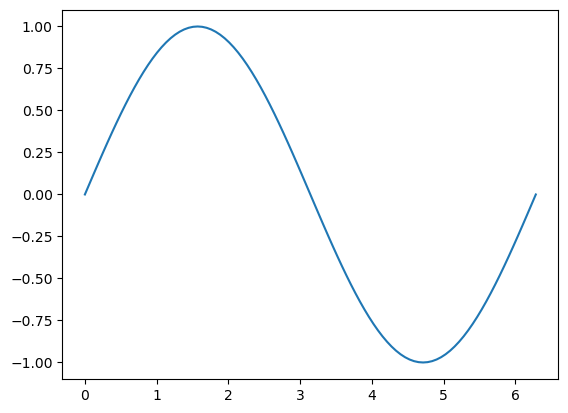

In [26]:
sines = np.sin(thetas)
plt.plot(thetas, sines)

Understanding how arrays work is particularly important for plotting. More about plots (and important tasks like labeling the axes) next time!